In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as snscollection_recovery_fee                     
import numpy as np
import os
import pandas as pd
import numpy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# Convert categorical data to numeric and separate target feature for training data

In [4]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [6]:
df2=train_df.select_dtypes(include=object)
df2.columns

Index(['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [7]:
df10=test_df.select_dtypes(include=object)
df10.columns

Index(['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [8]:
train_df.loan_status.value_counts()      

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [9]:
test_df.loan_status.value_counts()      

low_risk     2351
high_risk    2351
Name: loan_status, dtype: int64

In [10]:
df3 = pd.get_dummies(train_df.loc[:,['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag']])
df3

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_high_risk,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1,0
1,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,1,0
2,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,1,0
3,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0
4,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0
12176,0,0,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0
12177,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0
12178,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0


In [11]:
df11 = pd.get_dummies(test_df.loc[:,['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag']])
df11

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_high_risk,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1
1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1
2,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1
3,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1
4,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1
4698,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
4699,0,0,0,1,0,0,1,1,0,1,1,0,1,0,1,0,1
4700,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1


In [12]:
df3=train_df.select_dtypes(include=float)
df3.columns

df4=train_df.select_dtypes(include=int)
df4.columns

Index(['Unnamed: 0', 'index'], dtype='object')

In [13]:
df12=test_df.select_dtypes(include=float)
df12.columns

df13=test_df.select_dtypes(include=int)
df13.columns

Index(['Unnamed: 0', 'index'], dtype='object')

In [14]:
df3.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [15]:
df4.columns

Index(['Unnamed: 0', 'index'], dtype='object')

In [16]:
df12.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [17]:
df13.columns

Index(['Unnamed: 0', 'index'], dtype='object')

In [18]:
df5= pd.get_dummies(train_df.loc[:,['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']])
df5

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,0.0,3.0,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,2.0,2.0,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,0.0,5.0,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,0.0,1.0,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0


In [ ]:
# I believe the Logistic Regression will be more accurate than the Random Forest. 



In [37]:
# Non-scale training set
df_train201 = pd.concat([df5, df3], axis=1)
df_train201["loan_status"] = train_df.loan_status

df_train201["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train201.loan_status]
df_train201.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0


In [ ]:
df15= pd.get_dummies(test_df.loc[:, ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']])
df15.head()

In [ ]:
# Non-scale testing set
df_test100 = pd.concat([df3, df12], axis=1)
df_test100["loan_status"] = test_df.loan_status

df_test100["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test100.loan_status]
df_test100.head()

In [ ]:
X_train = df_train201.drop(["loan_status"], axis=1).values
y_train = df_train201["loan_status"].values

X_test = df_test100.drop(["loan_status"], axis=1).values
y_test = df_test100["loan_status"].values

In [19]:
df15= pd.get_dummies(test_df.loc[:, ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']])
df15.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [20]:
df_scaler = StandardScaler().fit(df5)
df_scaler2 = pd.DataFrame(df_scaler.transform(df5), columns=df5.columns)
df_scaler2.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,-0.148869,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,-0.148869,-0.182561,0.617581,0.992851,-0.351986,0.0,0.438026,0.790900,2.031592,0.049082


In [21]:
df_scaler20 = StandardScaler().fit(df15)
df_scaler25 = pd.DataFrame(df_scaler.transform(df15), columns=df15.columns)
df_scaler25.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2.207559,-1.120016,1.037148,0.297493,-0.118797,-0.320026,0.532133,0.864373,-0.351986,-0.359390,...,-0.148869,-0.182561,0.358842,-0.975390,-0.351986,0.0,1.710119,0.144260,1.838152,0.830624
1,-1.113486,0.218331,-1.019839,-0.207167,-0.463116,2.170653,-0.695401,-0.760478,-0.351986,-0.721803,...,-0.148869,-0.685637,-3.128502,-0.975390,-0.351986,0.0,-0.854304,-0.660250,-0.873954,-0.625935
2,-1.347913,0.542951,-1.292848,-0.284351,-0.663097,-0.320026,-0.695401,-1.085448,-0.351986,-0.567962,...,-0.148869,-0.685637,0.617581,-0.975390,-0.351986,0.0,-0.914226,-0.732760,-0.818685,-0.791627
3,0.254003,0.218331,-0.104615,0.060006,-0.437596,-0.320026,1.759668,-0.922963,-0.351986,-0.215151,...,-0.148869,0.823591,0.617581,0.500053,-0.351986,0.0,-0.740712,-0.315128,-0.562082,-0.388709
4,-1.347913,-0.320805,-1.320003,-0.236853,-0.272339,-0.320026,2.987203,-1.085448,-0.351986,-0.317711,...,-0.148869,0.320515,0.617581,-0.237668,-0.351986,0.0,-0.795312,-0.507872,-0.277843,-0.600029


In [22]:
# scale training set
df_train2 = pd.concat([df_scaler2, df3], axis=1)
df_train2["loan_status"] = train_df.loan_status

df_train2["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train2.loan_status]
df_train2.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0


In [23]:
# scale testing set
df_test100 = pd.concat([df_scaler25, df12], axis=1)
df_test100["loan_status"] = test_df.loan_status

df_test100["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test100.loan_status]
df_test100.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,2.207559,-1.120016,1.037148,0.297493,-0.118797,-0.320026,0.532133,0.864373,-0.351986,-0.359390,...,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0
1,-1.113486,0.218331,-1.019839,-0.207167,-0.463116,2.170653,-0.695401,-0.760478,-0.351986,-0.721803,...,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0
2,-1.347913,0.542951,-1.292848,-0.284351,-0.663097,-0.320026,-0.695401,-1.085448,-0.351986,-0.567962,...,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0
3,0.254003,0.218331,-0.104615,0.060006,-0.437596,-0.320026,1.759668,-0.922963,-0.351986,-0.215151,...,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0
4,-1.347913,-0.320805,-1.320003,-0.236853,-0.272339,-0.320026,2.987203,-1.085448,-0.351986,-0.317711,...,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0


In [24]:
X_train = df_train2.drop(["loan_status"], axis=1).values
y_train = df_train2["loan_status"].values

X_test = df_test100.drop(["loan_status"], axis=1).values
y_test = df_test100["loan_status"].values

In [32]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      6090
           1       0.67      0.58      0.63      6090

    accuracy                           0.65     12180
   macro avg       0.65      0.65      0.65     12180
weighted avg       0.65      0.65      0.65     12180

[[4378 1712]
 [2537 3553]]

Testing SET
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.30      0.39      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.49      4702
weighted avg       0.52      0.52      0.49      4702

[[1718  633]
 [1634  717]]


C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


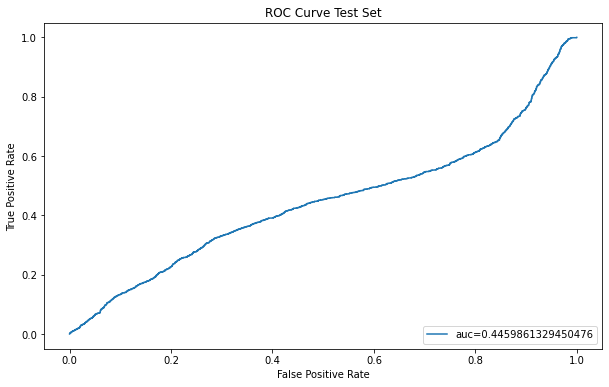

In [33]:
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.68      0.45      0.54      2351
           1       0.59      0.79      0.67      2351

    accuracy                           0.62      4702
   macro avg       0.63      0.62      0.61      4702
weighted avg       0.63      0.62      0.61      4702

[[1059 1292]
 [ 501 1850]]


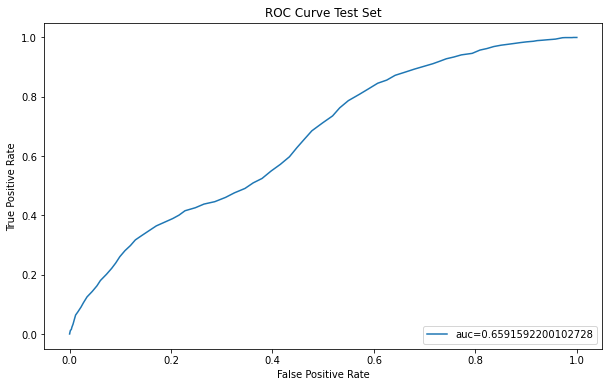

In [34]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)